In [1]:
import argparse
import logging
import time

import numpy as np
# import torch.utils.data
from torch.utils import data

from hardware.device import get_device
from inference.post_process import post_process_output
from utils.data import get_dataset
from utils.dataset_processing import evaluation, grasp
from utils.visualisation.plot import save_results
from usage.rgbd_dataset import Grasp_Rgbd_TestSet

from torchvision import transforms, utils
from torchvision import datasets
import torch
import matplotlib.pyplot as plt 
%matplotlib inline

# train_data = datasets.ImageFolder("usage/depth")      # ImageFolder文件夹名为其内的图片标签
import os
from PIL import Image
import numpy as np


device = torch.device("cpu")

dep_folder = "usage/depth"
rgb_folder = "usage/rgb"
dep_list = []
rgb_list = []

for file_name in os.listdir(dep_folder):
    dep_img = Image.open(os.path.join(dep_folder, file_name))
    dep_array = np.array(dep_img)
    dep_list.append(dep_array)

for file_name in os.listdir(rgb_folder):
    rgb_img = Image.open(os.path.join(rgb_folder, file_name))
    if rgb_img.mode == "RGBA":
        rgb_img = rgb_img.convert("RGB")
    rgb_array = np.array(rgb_img)
    rgb_list.append(rgb_array)

# print(dep_list[0].shape)
# print(rgb_list[0].shape)
print(len(dep_list), len(rgb_list))

# dep_list2 = np.expand_dims(dep_list[0], 2)
# print(dep_list2.shape)
test_array = [np.concatenate((np.expand_dims(dep_list[idx], 2), rgb_list[idx]),2)  for idx in range(len(dep_list))]
test_array = np.concatenate([np.expand_dims(np.transpose(array,(2, 0, 1)),0) for array in test_array], 0)       # [512, 4,224, 224]
# np.concatenate 
# print(test_array[0].shape)
print(test_array.shape)

TestDataset = Grasp_Rgbd_TestSet(device)
TestDataset.update(test_array)

Test_Loader = data.DataLoader(TestDataset, batch_size = 8, shuffle =True)

512 512
(512, 4, 224, 224)


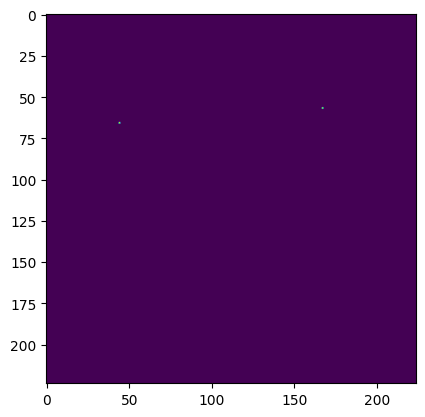

In [2]:
a = np.zeros((224,224))
a[66,44] = 1
a[57,167] = 1
plt.imshow(a)

In [ ]:
from inference.models.grconvnet3 import GenerativeResnet
# import gc

network = GenerativeResnet()

pos_list = []
print(Test_Loader)

for batch_idx, batch_data in enumerate(Test_Loader):
    batch_data = batch_data
    with torch.no_grad():
        label = network.predict(batch_data)
    # pos_list.append(label["pos"])
    pos_list.extend(torch.split(label["pos"], 1, dim=0))    # 1=每个子张量的大小
    # torch.cuda.empty_cache()
    del batch_data
    del label
    # gc.collect()
    # del batch_data

print(len(pos_list))

RGBA
(224, 224, 3)
(224, 224)


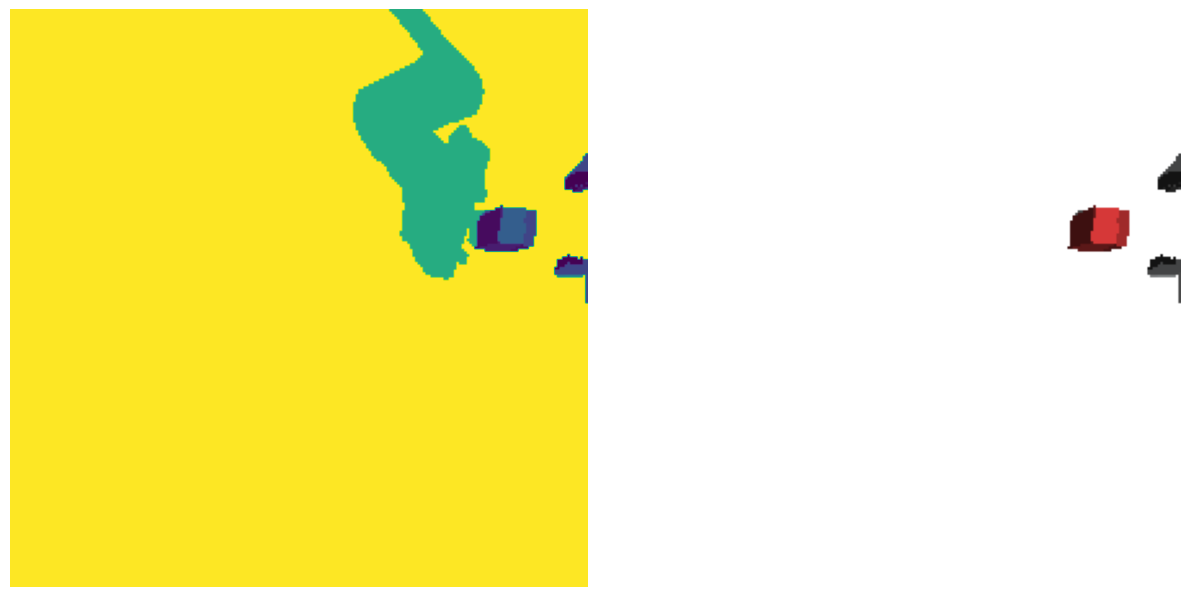

In [22]:
from skimage.filters import difference_of_gaussians
from skimage.color import rgb2gray   
import matplotlib.pylab as plt
from PIL import Image
import numpy as np

img = Image.open('franka_img/cam-0025-0000.png')
print(img.mode)
if img.mode == "RGBA":
    img = np.array(img.convert("RGB"))
print(img.shape)

name_list = ["r", "g", "b"]
for id,name in enumerate(name_list):
    np.savetxt(name+".txt", img[:,:,id], fmt='%d')  # fmt='%d' 表示以整数格式写入

im = img.copy()
im[im==165] = 255
im_filtered = im

im = rgb2gray(img) # convert to grayscale image
print(im.shape)
# im = im / im.max() # normalize
# im_filtered = difference_of_gaussians(im, 0.05, 10.0) # choose suitable low & high sigmas
# im_filtered = im_filtered / im_filtered.max()

plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(im), plt.axis('off')
plt.subplot(122), plt.imshow(im_filtered), plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

# 读取图像
image = cv2.imread('franka_img/cam-0000-0000.png')

# 将图像从 BGR 转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义灰色的 HSV 范围
lower_gray = np.array([0, 0, 50])   # 低灰色阈值
upper_gray = np.array([180, 25, 200])  # 高灰色阈值

# 创建掩码，识别灰色区域
mask = cv2.inRange(hsv_image, lower_gray, upper_gray)

# 反转掩码，得到非灰色区域
mask_inv = cv2.bitwise_not(mask)

# 使用掩码去除灰色阴影
result = cv2.bitwise_and(image, image, mask=mask_inv)

# 显示结果
cv2.imshow('Original Image', image)
cv2.imshow('Result Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
iter_time = 100
a = 5

while(iter_time>0):
    if a == 5:
        break
    print("hello")

    

In [10]:
import numpy as np
a = np.linspace(0,1,3)
b = np.arange(2)
print(a,b)
np.linalg.norm(a[:2]-b)
np.abs(5)

[0.  0.5 1. ] [0 1]


5

In [15]:
np.arctan2(2,1) # sin a, cos a


1.1071487177940904